In [4]:
#!/usr/bin/env python
import psutil
# gives a single float value
psutil.cpu_percent()
# gives an object with many fields
psutil.virtual_memory()
# you can convert that object to a dictionary 
dict(psutil.virtual_memory()._asdict())
# you can have the percentage of used RAM
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)

4.1
95.89517475388325


In [ ]:
import nltk
nltk.download('stopwords')

In [1]:
import import_ipynb
#from FunctionsList import *

import pandas as pd
import numpy as np
import seaborn as sns
import random
import gensim
import joblib 
from keras.utils import np_utils
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm, preprocessing
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing import sequence
from tensorflow.keras import regularizers, callbacks
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Using TensorFlow backend.


In [2]:
def remove_non_ascii(text):
    return ''.join([i if ord(i) < 128 else ' ' for i in text])
def remove_stopwords(text):
    cachedStopWords = stopwords.words("english")
    text = ' '.join([word for word in text.split() if word not in cachedStopWords])
    return text

In [3]:
import re
df = pd.read_json('/bigdata/users-data/sergiu.sabou/Beautifulsupa/Output/data.json', lines=True)
for i in range(len(df.Content)):
    df.Content[i] =  remove_stopwords(remove_non_ascii(re.sub(r'\b\w{1,3}\b', '', df.Content[i])))
    df.Title[i] = remove_stopwords(remove_non_ascii(re.sub(r'\b\w{1,3}\b', '', df.Title[i])))
df.head()

,Category,Title,Keywords,Content
0,Artificial Intelligence,Autonomous reciprocity: context matters,NONE,"continuing debate actionable ethics, special i..."
1,Artificial Intelligence,"Drones, robots perceived autonomy: implication...",NONE,IntroductionThis Special Issue explores percei...
2,Artificial Intelligence,Introduction: special issue critical robotics ...,NONE,"IntroductionIn recent years, design, study rob..."
3,Artificial Intelligence,Service robots affective labor: sociology labo...,"Affective labor, Human–robot interaction, Serv...",AbstractProfit-oriented service sectors touris...
4,Artificial Intelligence,like taking ball walk: boundary work software ...,"Autonomy, Boundary work, Complexity, Software ...","AbstractIn paper, explore choices boundary wor..."


In [4]:
cates = df.groupby('Category')
print("total categories:", cates.ngroups)
print(cates.size())

total categories: 11
Category
Artificial Intelligence                        1000
Computational Theory and Mathematics           1000
Computer Graphics and Computer-Aided Design     666
Computer Networks and Communications           1000
Computer Science Applications                   375
Computer Vision and Pattern Recognition        1000
Hardware and Architecture                       363
Human-Computer Interaction                     1000
Information Systems                            1000
Signal Processing                               413
Software                                        736
dtype: int64


In [5]:
# using headlines and short_description as input X

df['text'] = df.Title + " " + df.Content

# tokenizing

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.text)
X = tokenizer.texts_to_sequences(df.text)
df['words'] = X

# delete some empty and short data

df['word_length'] = df.words.apply(lambda i: len(i))
df = df[df.word_length >= 5]

df.head()

,Category,Title,Keywords,Content,text,words,word_length
0,Artificial Intelligence,Autonomous reciprocity: context matters,NONE,"continuing debate actionable ethics, special i...",Autonomous reciprocity: context matters contin...,"[1513, 8949, 121, 5212, 5299, 3884, 8305, 1321...",817
1,Artificial Intelligence,"Drones, robots perceived autonomy: implication...",NONE,IntroductionThis Special Issue explores percei...,"Drones, robots perceived autonomy: implication...","[4060, 974, 621, 2135, 2020, 2699, 125, 5023, ...",1282
2,Artificial Intelligence,Introduction: special issue critical robotics ...,NONE,"IntroductionIn recent years, design, study rob...",Introduction: special issue critical robotics ...,"[1657, 619, 469, 709, 2373, 39, 5826, 554, 567...",2220
3,Artificial Intelligence,Service robots affective labor: sociology labo...,"Affective labor, Human–robot interaction, Serv...",AbstractProfit-oriented service sectors touris...,Service robots affective labor: sociology labo...,"[231, 974, 2150, 5422, 9891, 5422, 769, 190762...",4565
4,Artificial Intelligence,like taking ball walk: boundary work software ...,"Autonomy, Boundary work, Complexity, Software ...","AbstractIn paper, explore choices boundary wor...",like taking ball walk: boundary work software ...,"[135, 822, 3310, 2287, 1531, 43, 126, 136, 562...",4948


In [6]:
df.word_length.describe()

count     8553.000000
mean      3738.682684
std       2591.577097
min         13.000000
25%       2105.000000
50%       3633.000000
75%       5061.000000
max      33192.000000
Name: word_length, dtype: float64

In [7]:
df.isna().any().tolist()

[False, False, False, False, False, False, False]

In [8]:
# category to id

categories = df.groupby('Category').size().index.tolist()
category_int = {}
int_category = {}
for i, k in enumerate(categories):
    category_int.update({k:i})
    int_category.update({i:k})

df['c2id'] = df['Category'].apply(lambda x: category_int[x])

### Impartirea setului de date

In [9]:
# imparte setul de date: 80% - 20% 
maxlen = 10000
X = [item[:maxlen] for item in df.text]
Y = df.c2id


#contents = data['review_content']
#labels = data['label']
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

In [10]:
print(len(X))
print(len(x_train))

8553
6842


In [8]:
x_train.head()

AttributeError: 'list' object has no attribute 'head'

In [11]:
y_train

6824    8
624     0
5518    7
3946    4
6121    7
       ..
5734    7
5191    6
5390    6
860     0
7270    8
Name: c2id, Length: 6842, dtype: int64

### TF-IDF Vectorization

In [12]:
#tfidf lucreaza cu secventele intregi - pt a nu mai detokeniza si tokeniza inca o data
#am definit functia mytokenizer care va fi inclusa ca parametru in tfidfvectorizer

vectorizer = TfidfVectorizer(min_df=2, lowercase=False)

x_train = vectorizer.fit_transform(x_train).toarray()
x_test = vectorizer.transform(x_test).toarray()

In [13]:
print("x_train.shape:", x_train.shape)# 6842 samples 157103 features
print("x_test.shape :", x_test.shape)

x_train.shape: (6842, 77150)
x_test.shape : (1711, 77150)


In [14]:
print("y_train.shape:", y_train.shape)
print("y_test.shape :", y_test.shape)

y_train.shape: (6842,)
y_test.shape : (1711,)


In [15]:
y_test

7038     8
1197     1
2862     3
6713     8
2860     3
        ..
2614     2
8454    10
4855     5
847      0
1877     1
Name: c2id, Length: 1711, dtype: int64

In [14]:
print(vectorizer.vocabulary_)

{'When': 39448, 'school': 69006, 'bells': 43649, 'last': 58662, 'rung': 68630, 'Jersey': 20178, 'schools': 69011, 'reaction': 66638, 'COVID': 8004, 'AbstractThis': 2966, 'study': 71482, 'examination': 51863, 'immediate': 56311, 'effects': 50488, 'remote': 67508, 'learning': 58782, 'shutdown': 69797, 'Spring': 35028, '2020': 1066, 'This': 36785, 'mixed': 60901, 'methods': 60441, 'relied': 67432, 'survey': 72086, 'data': 47998, 'capturing': 44929, 'experiences': 52096, 'difficulties': 49229, 'successes': 71819, 'public': 66055, 'educators': 50466, 'first': 52886, 'weeks': 76254, 'closures': 45804, 'These': 36748, 'teachers': 72730, 'administrators': 41258, 'librarians': 59016, 'personnel': 64131, 'disruptions': 49703, 'leave': 58837, 'indelible': 56720, 'changes': 45290, 'education': 50431, 'beyond': 43870, 'research': 67778, 'examines': 51871, 'beginning': 43556, 'findings': 52834, 'indicate': 56744, 'found': 53340, 'support': 72003, 'administration': 41251, 'also': 41753, 'encountered'

In [16]:
max_features = len(vectorizer.vocabulary_)
max_features

77150

### Random forest

In [17]:
# definirea modelului
rf = RandomForestClassifier() 
rf_model = rf.fit(x_train, y_train)

In [18]:
pred = rf_model.predict(x_test)

In [19]:
confusion_matrix(y_test, pred)

array([[ 61,  30,   5,  19,   1,  63,   1,  21,   3,   0,   5],
       [ 23, 145,   0,   5,   0,   1,  18,   3,   1,   0,  23],
       [  6,   2,  18,  17,   0,  52,   0,  18,   0,  19,   2],
       [ 10,  11,   7,  78,   4,  24,   0,  12,  30,   0,  11],
       [  6,   4,   0,  13,  22,   7,   0,   1,   0,   0,  16],
       [ 57,   5,  30,  14,   0,  50,   0,  16,   1,  14,   8],
       [  7,  24,   0,   9,   0,   1,  21,   1,   0,   0,   9],
       [ 20,   7,  13,  13,   0,   7,   0,  40, 103,   2,   1],
       [ 13,   6,   0,  31,   0,   3,   0,  81,  29,   0,  30],
       [  2,  10,  27,   3,   0,  22,   0,   7,   1,   4,   0],
       [  4,  26,   1,  10,   5,   8,   0,   3,  23,   0,  71]])

In [20]:
accuracy_score(y_test, pred)

0.31502045587375804

In [24]:
#grid search pentru parametrii cei mai buni
param_grid = { 
    'n_estimators': [100, 300, 500, 700, 800],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [10, 20, 30, 40, 50],
    'criterion' :['gini', 'entropy'],
    'bootstrap' :[True, False]
}

cv = GridSearchCV(rf, param_grid = param_grid, cv=2, n_jobs=-5, verbose=1) #n_jobs=> usee all cores to speed up

search_results = cv.fit(x_train, y_train)

Fitting 2 folds for each of 200 candidates, totalling 400 fits


/bigdata/users-data/sergiu.sabou/envs/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [25]:
#adauga toate rezultatele intr-un dataframe
# afiseaza primele 5 rezultate dupa acuratete

res = pd.concat([pd.DataFrame(search_results.cv_results_["params"]),
                 pd.DataFrame(search_results.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
res.sort_values(by=['Accuracy'], ascending=False).head(5)

,bootstrap,criterion,max_depth,max_features,n_estimators,Accuracy
132,False,gini,40,auto,500,0.385852
134,False,gini,40,auto,800,0.385706
136,False,gini,40,sqrt,300,0.385706
147,False,gini,50,sqrt,500,0.385414
139,False,gini,40,sqrt,800,0.384975


In [26]:
search_results.best_params_
#{'bootstrap': False,
# 'criterion': 'gini',
# 'max_depth': 40,
# 'max_features': 'auto',
# 'n_estimators': 500}

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'auto',
 'n_estimators': 500}

In [27]:
# definirea modelului
bestRF = RandomForestClassifier(n_estimators=500, 
                                criterion='gini', 
                                max_depth=40, 
                                max_features='auto',
                                bootstrap=False)
                                   
bestRF_model = bestRF.fit(x_train, y_train)

In [28]:
pred = bestRF_model.predict(x_test)

In [29]:
accuracy_score(y_test, pred)

0.3383985973115137

In [32]:
print(classification_report(pred, y_test, target_names=['Artificial Intelligence', 'Computational Theory and Mathematics', 'Computer Graphics and Computer-Aided Design','Computer Networks and Communications','Computer Science Applications','Computer Vision and Pattern Recognition','Hardware and Architecture','Human-Computer Interaction','Information Systems','Signal Processing','Software']))

                                             precision    recall  f1-score   support

                    Artificial Intelligence       0.33      0.35      0.34       198
       Computational Theory and Mathematics       0.68      0.53      0.60       280
Computer Graphics and Computer-Aided Design       0.16      0.23      0.19        95
       Computer Networks and Communications       0.47      0.36      0.41       244
              Computer Science Applications       0.29      0.71      0.41        28
    Computer Vision and Pattern Recognition       0.30      0.24      0.27       241
                  Hardware and Architecture       0.29      0.58      0.39        36
                 Human-Computer Interaction       0.17      0.18      0.17       194
                        Information Systems       0.18      0.19      0.18       180
                          Signal Processing       0.07      0.13      0.09        39
                                   Software       0.52      0.44

Text(0.5, 1.0, 'Confusion Matrix')

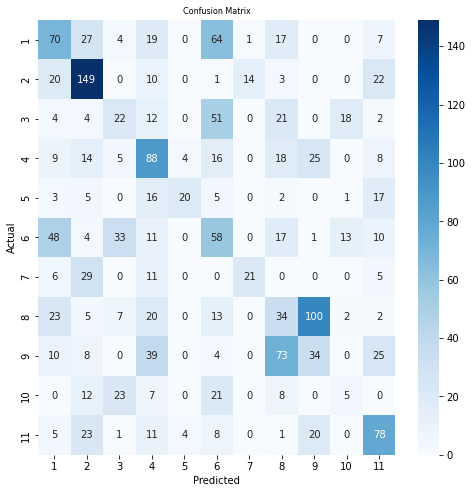

In [34]:
import matplotlib.pyplot as plt
confusion_mat = confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=[1,2,3,4,5,6,7,8,9,10,11], 
            yticklabels=[1,2,3,4,5,6,7,8,9,10,11])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix", size=8)

In [37]:
joblib.dump(bestRF_model, "/bigdata/users-data/sergiu.sabou/Beautifulsupa/tfidf_rf_model.joblib")

['/bigdata/users-data/sergiu.sabou/Beautifulsupa/tfidf_rf_model.joblib']

### SVM

In [38]:
# definirea modelului
clf = SVC()
svm_model = clf.fit(x_train, y_train)

In [ ]:
#clf = sequantial
#layer dense(128,relu)
#layer dense(39,relu)
#layer softmax(11)

In [39]:
pred = clf.predict(x_test)
accuracy_score(pred, y_test)

0.3787258912916423

In [40]:
svm_model.get_params()
joblib.dump(svm_model, "/bigdata/users-data/sergiu.sabou/Beautifulsupa/tfidf_svm_model.joblib")

['/bigdata/users-data/sergiu.sabou/Beautifulsupa/tfidf_svm_model.joblib']

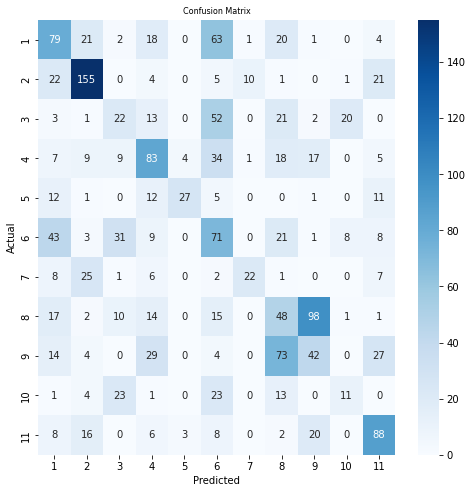

In [41]:
confusion_mat = confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=[1,2,3,4,5,6,7,8,9,10,11], 
            yticklabels=[1,2,3,4,5,6,7,8,9,10,11])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix", size=8);

In [42]:
print(classification_report(pred, y_test, target_names=['Artificial Intelligence', 'Computational Theory and Mathematics', 'Computer Graphics and Computer-Aided Design','Computer Networks and Communications','Computer Science Applications','Computer Vision and Pattern Recognition','Hardware and Architecture','Human-Computer Interaction','Information Systems','Signal Processing','Software']))

                                             precision    recall  f1-score   support

                    Artificial Intelligence       0.38      0.37      0.37       214
       Computational Theory and Mathematics       0.71      0.64      0.67       241
Computer Graphics and Computer-Aided Design       0.16      0.22      0.19        98
       Computer Networks and Communications       0.44      0.43      0.43       195
              Computer Science Applications       0.39      0.79      0.52        34
    Computer Vision and Pattern Recognition       0.36      0.25      0.30       282
                  Hardware and Architecture       0.31      0.65      0.42        34
                 Human-Computer Interaction       0.23      0.22      0.23       218
                        Information Systems       0.22      0.23      0.22       182
                          Signal Processing       0.14      0.27      0.19        41
                                   Software       0.58      0.51

In [43]:
#grid search parametrii cei mai buni
param_grid = {'C': [1, 10, 100], #regularization param - penalty param
              'gamma': [0.1, 0.01, 0.001], #kernel coef - how far influences the calculation of plausible line of separation
              'kernel': ['rbf', 'poly']}

grid = GridSearchCV(clf, param_grid, cv=2, n_jobs=-1, verbose=2)
svm_search_results = grid.fit(x_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=68.1min
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=68.4min
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=68.9min
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=71.6min
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=35.3min
[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=45.5min
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=36.0min
[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=46.1min
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=38.8min
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=49.1min
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=51.7min
[CV] END .....................C=100, gamma=0.01,

/bigdata/users-data/sergiu.sabou/envs/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
7 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/bigdata/users-data/sergiu.sabou/envs/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/bigdata/users-data/sergiu.sabou/envs/lib/python3.8/site-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/bigdata/users-data/sergiu.sabou/envs/lib/python3.8/site-packages/sklearn/sv

[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=67.7min
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=35.2min
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=51.9min
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=51.3min
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=51.9min
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=52.1min
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=51.3min
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=54.0min
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=51.5min
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=54.3min


In [44]:
#adauga toate rezultatele intr-un dataframe
# afiseaza primele 5 rezultate dupa acuratete

svm_res = pd.concat([pd.DataFrame(svm_search_results.cv_results_["params"]),
                 pd.DataFrame(svm_search_results.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
svm_res.sort_values(by=['Accuracy'], ascending=False).head(5)
#{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

,C,gamma,kernel,Accuracy
16,100,0.001,rbf,0.409091
8,10,0.010,rbf,0.408799
14,100,0.010,rbf,0.405437
12,100,0.100,rbf,0.399737
0,1,0.100,rbf,0.399445


In [45]:
svm_search_results.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [46]:
# definirea modelului cel mai bun
clf = SVC(C=100, 
          gamma= 0.001, 
          kernel='rbf', 
          probability=True)
svm_model = clf.fit(x_train, y_train)

In [47]:
pred = svm_model.predict(x_test)
accuracy_score(pred, y_test)

0.4260666277030976

In [59]:
joblib.dump(svm_model, "/bigdata/users-data/sergiu.sabou/Beautifulsupa/tfidf_svm_model.joblib")

['/bigdata/users-data/sergiu.sabou/Beautifulsupa/tfidf_svm_model.joblib']

Text(0.5, 1.0, 'Confusion Matrix')

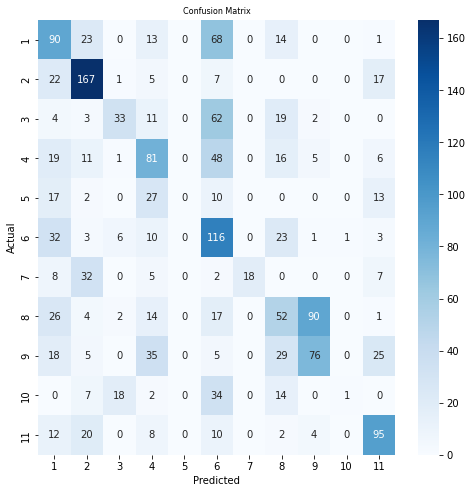

In [48]:
confusion_mat = confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=[1,2,3,4,5,6,7,8,9,10,11], 
            yticklabels=[1,2,3,4,5,6,7,8,9,10,11])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix", size=8)

In [49]:
print(classification_report(pred, y_test, target_names=['Artificial Intelligence', 'Computational Theory and Mathematics', 'Computer Graphics and Computer-Aided Design','Computer Networks and Communications','Computer Science Applications','Computer Vision and Pattern Recognition','Hardware and Architecture','Human-Computer Interaction','Information Systems','Signal Processing','Software']))

                                             precision    recall  f1-score   support

                    Artificial Intelligence       0.43      0.36      0.39       248
       Computational Theory and Mathematics       0.76      0.60      0.67       277
Computer Graphics and Computer-Aided Design       0.25      0.54      0.34        61
       Computer Networks and Communications       0.43      0.38      0.41       211
              Computer Science Applications       0.00      0.00      0.00         0
    Computer Vision and Pattern Recognition       0.59      0.31      0.40       379
                  Hardware and Architecture       0.25      1.00      0.40        18
                 Human-Computer Interaction       0.25      0.31      0.28       169
                        Information Systems       0.39      0.43      0.41       178
                          Signal Processing       0.01      0.50      0.03         2
                                   Software       0.63      0.57

/bigdata/users-data/sergiu.sabou/envs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/bigdata/users-data/sergiu.sabou/envs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/bigdata/users-data/sergiu.sabou/envs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Bernouli NB

In [50]:
from sklearn.naive_bayes import BernoulliNB

In [51]:
clf = BernoulliNB(binarize=None)
bnb_model = clf.fit(x_train, y_train)

In [52]:
pred = clf.predict(x_test)
accuracy_score(pred, y_test)

0.26767971946230273

In [53]:
param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

grid = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1, verbose=2)
bnb_search_results = grid.fit(x_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [54]:
#adauga toate rezultatele intr-un dataframe
# afiseaza primele 5 rezultate dupa acuratete

bnb_res = pd.concat([pd.DataFrame(bnb_search_results.cv_results_["params"]),
                 pd.DataFrame(bnb_search_results.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
bnb_res.sort_values(by=['Accuracy'], ascending=False).head(5)

,alpha,Accuracy
0,0.01,0.392135
1,0.10,0.358374
2,0.50,0.304296
3,1.00,0.199649
4,10.00,0.118825


In [55]:
bnb_search_results.best_params_

{'alpha': 0.01}

[CV] END .........................................alpha=0.01; total time=   4.0s
[CV] END ..........................................alpha=0.5; total time=   4.1s
[CV] END ..........................................alpha=0.1; total time=   4.0s
[CV] END .........................................alpha=0.01; total time=   4.0s
[CV] END .........................................alpha=10.0; total time=   4.1s
[CV] END .........................................alpha=0.01; total time=   4.0s
[CV] END ..........................................alpha=0.5; total time=   4.1s
[CV] END .........................................alpha=10.0; total time=   4.0s
[CV] END ..........................................alpha=0.5; total time=   4.0s
[CV] END ..........................................alpha=0.1; total time=   4.0s
[CV] END ..........................................alpha=1.0; total time=   3.9s
[CV] END ..........................................alpha=0.1; total time=   4.2s
[CV] END ...................

In [56]:
clf = BernoulliNB(binarize=None, alpha=0.001)
bnb_best_model = clf.fit(x_train,y_train)

In [57]:
pred = clf.predict(x_test)
accuracy_score(pred, y_test)

0.3950905902980713

Text(0.5, 1.0, 'Confusion Matrix')

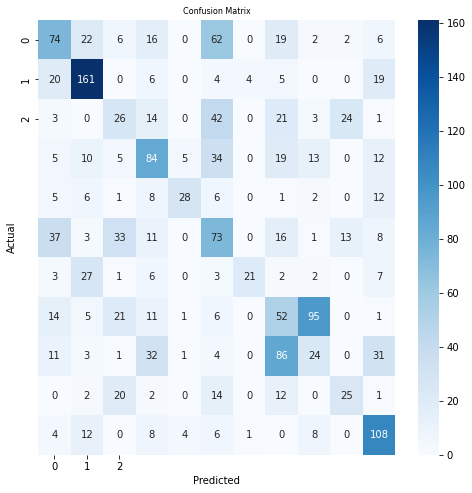

In [58]:
confusion_mat = confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=[0,1,2], 
            yticklabels=[0,1,2])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix", size=8)

In [60]:
print(classification_report(pred, y_test, target_names=['Artificial Intelligence', 'Computational Theory and Mathematics', 'Computer Graphics and Computer-Aided Design','Computer Networks and Communications','Computer Science Applications','Computer Vision and Pattern Recognition','Hardware and Architecture','Human-Computer Interaction','Information Systems','Signal Processing','Software']))

                                             precision    recall  f1-score   support

                    Artificial Intelligence       0.35      0.42      0.38       176
       Computational Theory and Mathematics       0.74      0.64      0.69       251
Computer Graphics and Computer-Aided Design       0.19      0.23      0.21       114
       Computer Networks and Communications       0.45      0.42      0.44       198
              Computer Science Applications       0.41      0.72      0.52        39
    Computer Vision and Pattern Recognition       0.37      0.29      0.33       254
                  Hardware and Architecture       0.29      0.81      0.43        26
                 Human-Computer Interaction       0.25      0.22      0.24       233
                        Information Systems       0.12      0.16      0.14       150
                          Signal Processing       0.33      0.39      0.36        64
                                   Software       0.72      0.52

In [61]:
joblib.dump(bnb_best_model, "/bigdata/users-data/sergiu.sabou/Beautifulsupa/tfidf_bnb_model.joblib")

['/bigdata/users-data/sergiu.sabou/Beautifulsupa/tfidf_bnb_model.joblib']